In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
files.upload()

Saving Karnataka_Post_Monsoon_Data.csv to Karnataka_Post_Monsoon_Data (1).csv


{'Karnataka_Post_Monsoon_Data (1).csv': b'States,Period,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020\nKarnataka,Jan,23.36,23.26,23.16,22.73,22.34,23.05,22.88,22.65,23.04,22.95,23.18,22.87,22.2,22.82,23.09,22.85,22.5,22.08,23.9,23.22,23.57,22.97,22.6,23.32,22.22,23.48,23.67,23.56,23.21,23.21,23.24,22.59,23.09,22.36,22.69,23.46,22.58,23.77,22.92,22.04,23.41,23.22,23.46,23.16,22.68,22.16,23.52,23.46,22.94,22.76,22.69,23.17,23.15,22.9,23.22,22.8

**SUMMER**

In [ ]:
# Load the data from the provided file
data = pd.read_csv('Karnataka_Post_Monsoon_Data.csv')

# Extract the summer temperature data for the months March, April, and May
summer_months = ['Mar', 'Apr', 'May']
summer_data = data[data['Period'].isin(summer_months)]

# Set the 'States' column as the index
summer_data.set_index('States', inplace=True)

# Select only the columns representing the years
summer_data = summer_data.loc[:, '1901':]
print(summer_data.head())

            1901   1902   1903   1904   1905   1906   1907   1908   1909  \
States                                                                     
Karnataka  27.18  28.02  27.16  26.87  26.99  26.99  27.24  26.78  27.73   
Karnataka  29.17  29.48  29.20  29.44  28.01  29.89  28.22  29.89  28.45   
Karnataka  28.64  29.65  28.24  28.65  29.07  29.78  28.64  29.03  28.84   

            1910  ...   2011   2012   2013   2014   2015   2016   2017   2018  \
States            ...                                                           
Karnataka  27.44  ...  28.29  28.41  28.52  27.99  28.07  29.37  28.71  28.71   
Karnataka  29.54  ...  29.17  30.33  30.09  30.17  29.30  30.99  30.84  30.23   
Karnataka  29.24  ...  29.45  29.96  30.25  29.46  29.82  29.90  30.24  29.80   

            2019   2020  
States                   
Karnataka  28.79  28.45  
Karnataka  30.80  30.22  
Karnataka  30.32  30.27  

[3 rows x 120 columns]


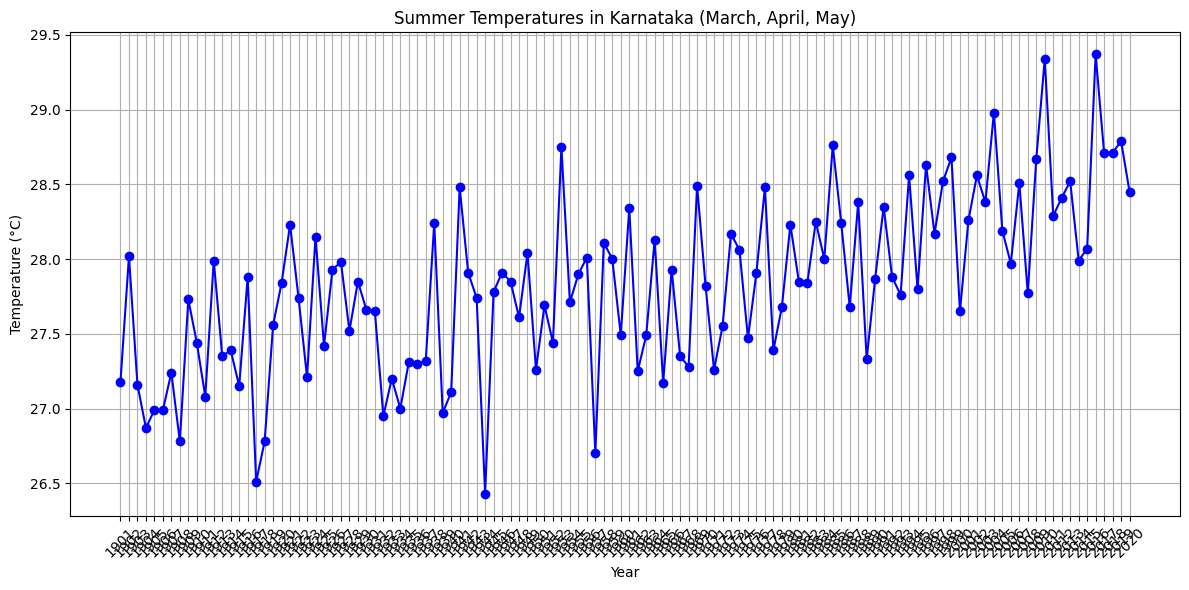

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(summer_data.columns, summer_data.iloc[0], marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Summer Temperatures in Karnataka (March, April, May)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Define a function to fit ARIMA model and make forecasts
def fit_arima(series, order):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

# Define function to forecast future values
def forecast_future(model_fit, steps):
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Set the ARIMA parameters (p, d, q)
p = 5  # AutoRegressive (AR) order
d = 1  # Integration (I) order
q = 1  # Moving Average (MA) order

# Initialize empty DataFrame to store forecasts
forecast_df = pd.DataFrame()

# Loop over each state's data and forecast temperatures for 2030, 2040, and 2050
for state, series in summer_data.iterrows():
    model_fit = fit_arima(series, order=(p, d, q))
    forecast = forecast_future(model_fit, steps=3)  # Forecast for 2030, 2040, 2050
    forecast_df[state] = forecast

# Set index for the forecast DataFrame
forecast_df.index = [2030, 2040, 2050]

# Print forecasted temperatures
print(forecast_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

      Karnataka
2030  29.802773
2040  29.900805
2050  29.886686


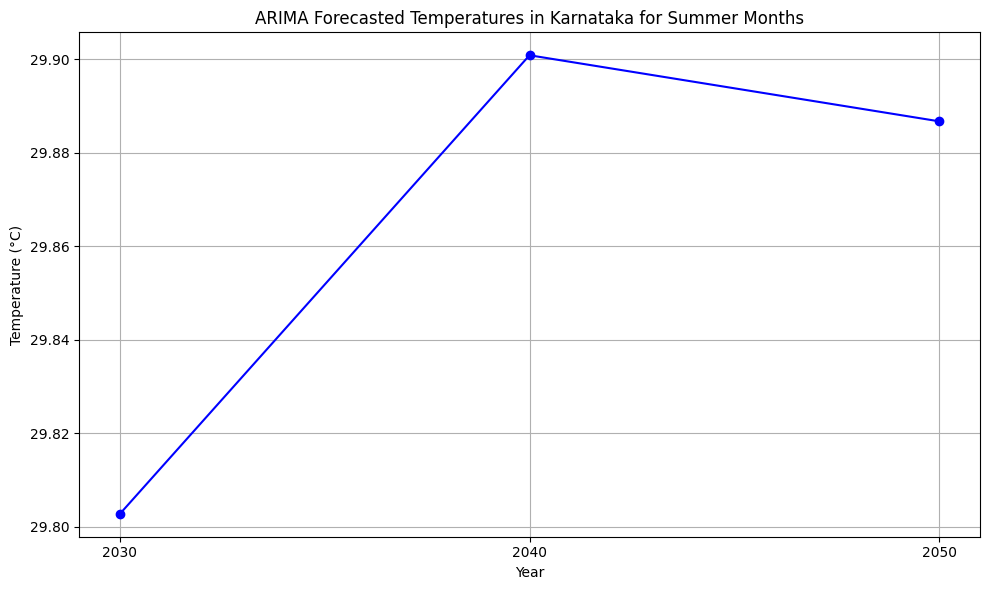

In [ ]:
import matplotlib.pyplot as plt

# Define the years for the forecast
years = [2030, 2040, 2050]

# Plot the ARIMA forecasted temperatures for the Summer months in a line graph
plt.figure(figsize=(10, 6))
plt.plot(years, forecast_df, marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('ARIMA Forecasted Temperatures in Karnataka for Summer Months')
plt.grid(True)
plt.xticks(years)
plt.tight_layout()
plt.show()


**WINTER**

In [ ]:
# Load the data from the provided file
data = pd.read_csv('Karnataka_Post_Monsoon_Data.csv')

# Extract the winter temperature data for the months March, April, and May
winter_months = ['Jan', 'Feb']
winter_data = data[data['Period'].isin(winter_months)]

# Set the 'States' column as the index
winter_data.set_index('States', inplace=True)

# Select only the columns representing the years
winter_data = winter_data.loc[:, '1901':]
print(winter_data.head())

            1901   1902   1903   1904   1905   1906   1907   1908   1909  \
States                                                                     
Karnataka  23.36  23.26  23.16  22.73  22.34  23.05  22.88  22.65  23.04   
Karnataka  24.51  24.71  24.61  24.21  24.08  24.96  24.75  24.48  24.88   

            1910  ...   2011   2012   2013   2014   2015   2016   2017   2018  \
States            ...                                                           
Karnataka  22.95  ...  23.41  23.55  24.22  23.93  23.35  24.21  23.95  23.75   
Karnataka  24.64  ...  25.52  25.79  26.13  25.44  25.66  26.85  26.13  25.93   

            2019   2020  
States                   
Karnataka  23.32  24.29  
Karnataka  26.19  26.34  

[2 rows x 120 columns]


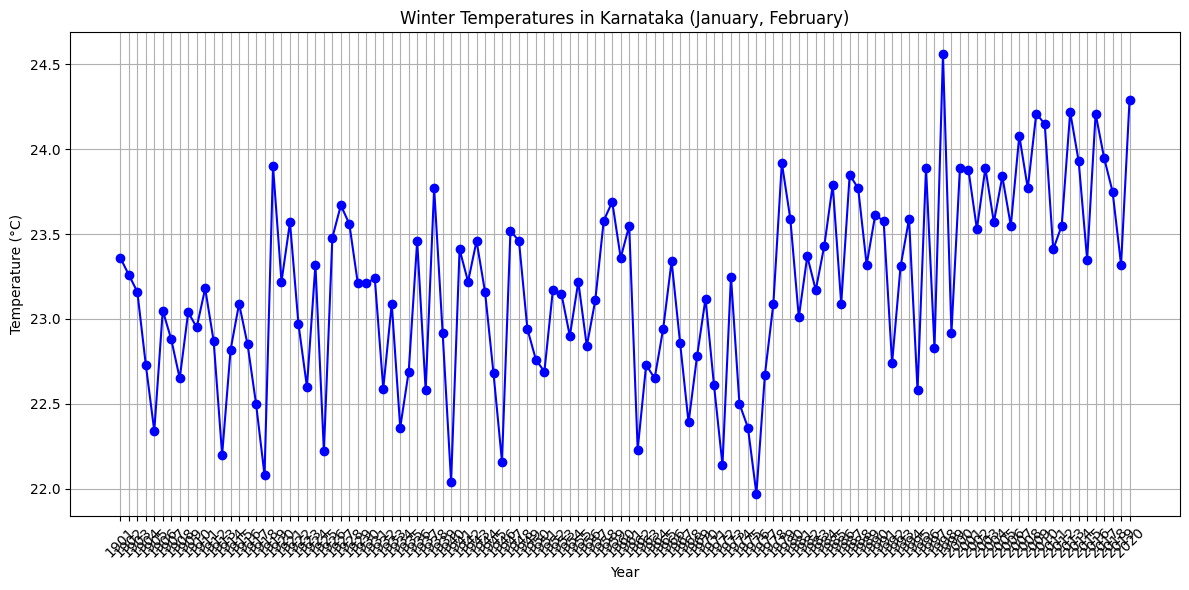

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(winter_data.columns, winter_data.iloc[0], marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Winter Temperatures in Karnataka (January, February)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Define a function to fit ARIMA model and make forecasts
def fit_arima(series, order):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

# Define function to forecast future values
def forecast_future(model_fit, steps):
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Set the ARIMA parameters (p, d, q)
p = 5  # AutoRegressive (AR) order
d = 1  # Integration (I) order
q = 1  # Moving Average (MA) order

# Initialize empty DataFrame to store forecasts
forecast_df = pd.DataFrame()

# Loop over each state's data and forecast temperatures for 2030, 2040, and 2050
for state, series in winter_data.iterrows():
    model_fit = fit_arima(series, order=(p, d, q))
    forecast = forecast_future(model_fit, steps=3)  # Forecast for 2030, 2040, 2050
    forecast_df[state] = forecast

# Set index for the forecast DataFrame
forecast_df.index = [2030, 2040, 2050]

# Print forecasted temperatures
print(forecast_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

      Karnataka
2030  25.928323
2040  26.084824
2050  26.124394


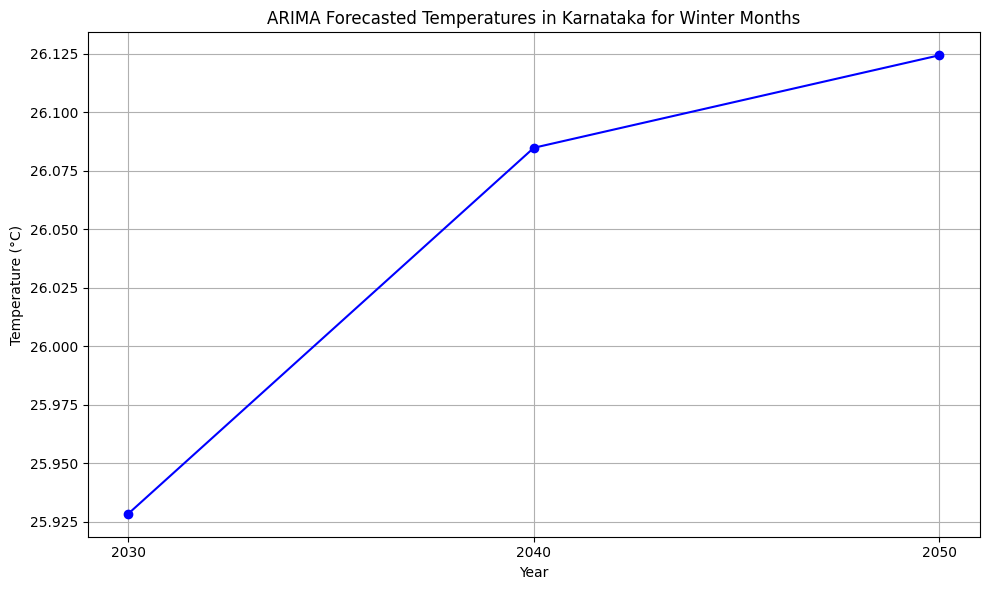

In [ ]:
import matplotlib.pyplot as plt

# Define the years for the forecast
years = [2030, 2040, 2050]

# Plot the ARIMA forecasted temperatures for the Winter months in a line graph
plt.figure(figsize=(10, 6))
plt.plot(years, forecast_df, marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('ARIMA Forecasted Temperatures in Karnataka for Winter Months')
plt.grid(True)
plt.xticks(years)
plt.tight_layout()
plt.show()

**MONSOON**

In [ ]:
import pandas as pd

# Load the data from the provided file
data = pd.read_csv('Karnataka_Post_Monsoon_Data.csv')

# Extract the monsoon temperature data for the months of June to September
monsoon_months = ['Jun', 'Jul', 'Aug', 'Sep']
monsoon_data = data[data['Period'].isin(monsoon_months)]

# Set the 'States' column as the index
monsoon_data.set_index('States', inplace=True)

# Select only the columns representing the years
monsoon_data = monsoon_data.loc[:, '1901':]

# Check the extracted monsoon temperature data for June to September
print(monsoon_data.head())


            1901   1902   1903   1904   1905   1906   1907   1908   1909  \
States                                                                     
Karnataka  26.47  27.17  26.84  25.80  27.28  26.04  26.30  26.85  25.89   
Karnataka  24.77  25.38  24.69  24.69  25.49  24.92  25.03  24.46  24.26   
Karnataka  24.43  25.40  24.49  24.91  24.92  24.52  23.99  24.27  24.54   
Karnataka  25.43  24.73  24.70  25.00  25.08  24.56  25.26  24.79  24.36   

            1910  ...   2011   2012   2013   2014   2015   2016   2017   2018  \
States            ...                                                           
Karnataka  26.04  ...  26.58  27.33  26.00  28.29  26.62  26.54  26.82  26.86   
Karnataka  25.06  ...  25.39  25.70  24.56  25.89  26.14  25.44  25.99  25.44   
Karnataka  24.38  ...  25.38  25.24  25.01  25.64  25.99  25.80  25.58  25.17   
Karnataka  24.35  ...  25.81  25.78  25.54  25.90  26.26  25.41  26.09  25.93   

            2019   2020  
States                   
Karn

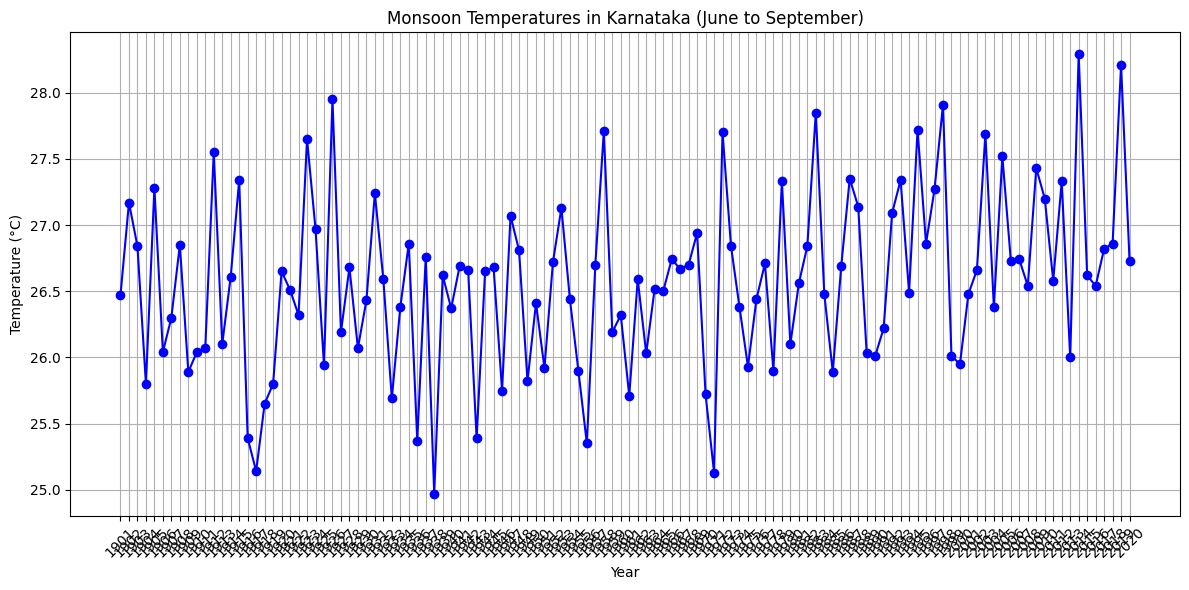

In [ ]:
import matplotlib.pyplot as plt

# Visualize the monsoon temperature data for June to September
plt.figure(figsize=(12, 6))
plt.plot(monsoon_data.columns, monsoon_data.iloc[0], marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Monsoon Temperatures in Karnataka (June to September)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define a function to fit ARIMA model and make forecasts
def fit_arima(series, order):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

# Define function to forecast future values
def forecast_future(model_fit, steps):
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Set the ARIMA parameters (p, d, q)
p = 5  # AutoRegressive (AR) order
d = 1  # Integration (I) order
q = 1  # Moving Average (MA) order

# Initialize empty DataFrame to store forecasts
forecast_df = pd.DataFrame()

# Loop over each state's data and forecast temperatures for 2030, 2040, and 2050
for state, series in monsoon_data.iterrows():
    model_fit = fit_arima(series, order=(p, d, q))
    forecast = forecast_future(model_fit, steps=3)  # Forecast for 2030, 2040, 2050
    forecast_df[state] = forecast

# Set index for the forecast DataFrame
forecast_df.index = [2030, 2040, 2050]

# Print forecasted temperatures
print(forecast_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

      Karnataka
2030  25.800716
2040  25.835036
2050  25.832873


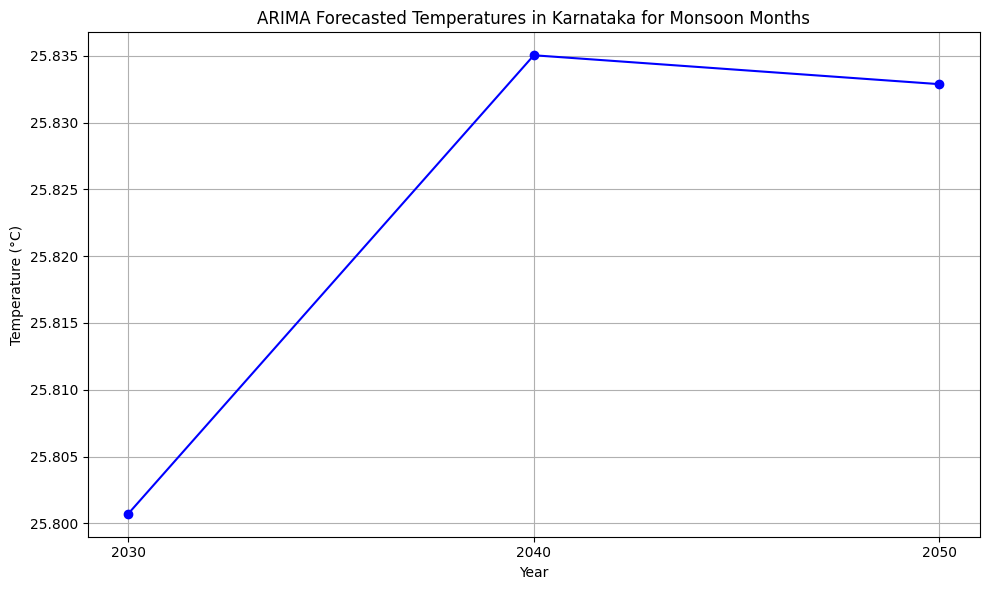

In [ ]:
import matplotlib.pyplot as plt

# Define the years for the forecast
years = [2030, 2040, 2050]

# Plot the ARIMA forecasted temperatures for the Monsoon months in a line graph
plt.figure(figsize=(10, 6))
plt.plot(years, forecast_df, marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('ARIMA Forecasted Temperatures in Karnataka for Monsoon Months')
plt.grid(True)
plt.xticks(years)
plt.tight_layout()
plt.show()

**POST-MONSOON**

In [ ]:
import pandas as pd

# Load the data from the provided file
data = pd.read_csv('Karnataka_Post_Monsoon_Data.csv')

# Extract the post-monsoon temperature data for the months of October to December
post_monsoon_months = ['Oct', 'Nov', 'Dec']
post_monsoon_data = data[data['Period'].isin(post_monsoon_months)]

# Set the 'States' column as the index
post_monsoon_data.set_index('States', inplace=True)

# Select only the columns representing the years
post_monsoon_data = post_monsoon_data.loc[:, '1901':]

# Check the extracted post-monsoon temperature data
print(post_monsoon_data.head())


            1901   1902   1903   1904   1905   1906   1907   1908   1909  \
States                                                                     
Karnataka  25.34  25.17  24.62  25.19  25.26  24.90  25.52  25.13  25.10   
Karnataka  23.62  23.33  22.75  23.04  23.99  23.87  24.13  22.90  23.86   
Karnataka  22.35  22.71  21.74  22.10  21.99  22.67  22.10  21.40  23.04   

            1910  ...   2011   2012   2013   2014   2015   2016   2017   2018  \
States            ...                                                           
Karnataka  24.61  ...  26.45  25.84  25.92  26.14  26.66  25.78  26.34  26.39   
Karnataka  22.22  ...  24.77  24.61  24.73  24.78  25.20  24.08  24.82  25.33   
Karnataka  21.48  ...  23.69  24.12  23.22  23.31  24.42  23.72  23.61  23.77   

            2019   2020  
States                   
Karnataka  25.78  26.07  
Karnataka  25.45  25.03  
Karnataka  24.16  23.82  

[3 rows x 120 columns]


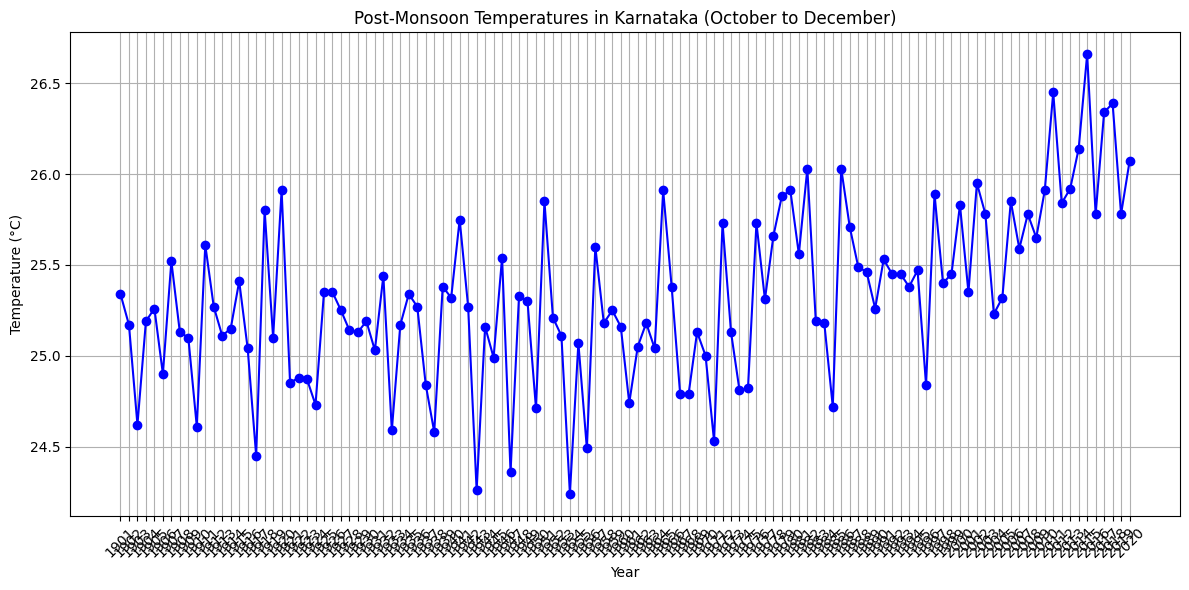

In [ ]:
import matplotlib.pyplot as plt

# Visualize the post-monsoon temperature data for October to December
plt.figure(figsize=(12, 6))
plt.plot(post_monsoon_data.columns, post_monsoon_data.iloc[0], marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Post-Monsoon Temperatures in Karnataka (October to December)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define a function to fit ARIMA model and make forecasts
def fit_arima(series, order):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

# Define function to forecast future values
def forecast_future(model_fit, steps):
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Set the ARIMA parameters (p, d, q)
p = 5  # AutoRegressive (AR) order
d = 1  # Integration (I) order
q = 1  # Moving Average (MA) order

# Initialize empty DataFrame to store forecasts
forecast_df = pd.DataFrame()

# Loop over each state's data and forecast temperatures for 2030, 2040, and 2050
for state, series in post_monsoon_data.iterrows():
    model_fit = fit_arima(series, order=(p, d, q))
    forecast = forecast_future(model_fit, steps=3)  # Forecast for 2030, 2040, 2050
    forecast_df[state] = forecast

# Set index for the forecast DataFrame
forecast_df.index = [2030, 2040, 2050]

# Print forecasted temperatures
print(forecast_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

      Karnataka
2030  23.740795
2040  23.680526
2050  23.735593


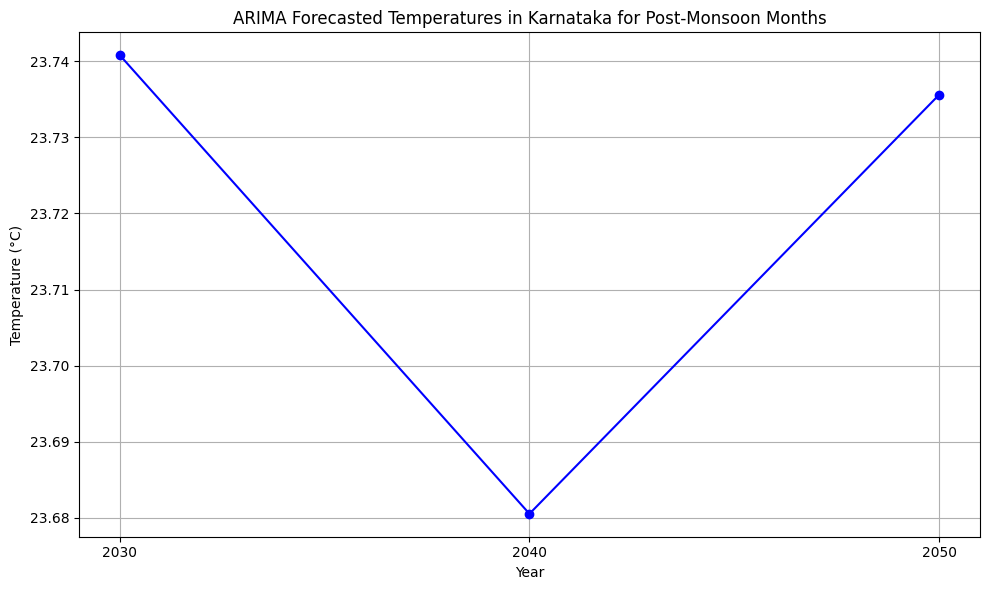

In [ ]:
import matplotlib.pyplot as plt

# Define the years for the forecast
years = [2030, 2040, 2050]

# Plot the ARIMA forecasted temperatures for the Post-Monsoon months in a line graph
plt.figure(figsize=(10, 6))
plt.plot(years, forecast_df, marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('ARIMA Forecasted Temperatures in Karnataka for Post-Monsoon Months')
plt.grid(True)
plt.xticks(years)
plt.tight_layout()
plt.show()

**ANNUAL**

In [ ]:
import pandas as pd

# Load the data from the provided file
data = pd.read_csv('Karnataka_Post_Monsoon_Data.csv')

# Extract the annual temperature data
annual = ['Annual']
annual_data = data[data['Period'].isin(annual)]

# Set the 'States' column as the index
annual_data.set_index('States', inplace=True)

# Select only the columns representing the years
annual_data = annual_data.loc[:, '1901':]

# Check the extracted annual temperature data
print(annual_data.head())


            1901   1902   1903   1904   1905   1906   1907   1908   1909  \
States                                                                     
Karnataka  25.44  25.75  25.18  25.22  25.38  25.51  25.34  25.22  25.33   

            1910  ...   2011   2012   2013   2014   2015   2016   2017   2018  \
States            ...                                                           
Karnataka  25.16  ...  26.16  26.39  26.18  26.41  26.46  26.51  26.59  26.44   

            2019   2020  
States                   
Karnataka  26.67  26.51  

[1 rows x 120 columns]


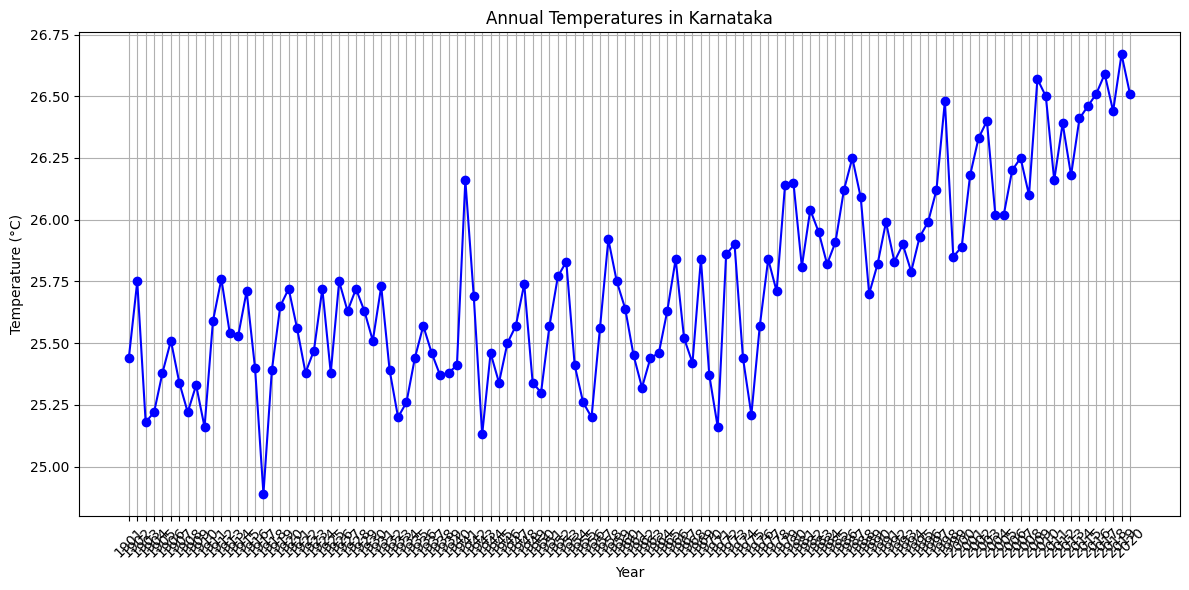

In [ ]:
import matplotlib.pyplot as plt

# Visualize the annual temperature data
plt.figure(figsize=(12, 6))
plt.plot(annual_data.columns, annual_data.iloc[0], marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Annual Temperatures in Karnataka')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define a function to fit ARIMA model and make forecasts
def fit_arima(series, order):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

# Define function to forecast future values
def forecast_future(model_fit, steps):
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Set the ARIMA parameters (p, d, q)
p = 5  # AutoRegressive (AR) order
d = 1  # Integration (I) order
q = 1  # Moving Average (MA) order

# Initialize empty DataFrame to store forecasts
forecast_df = pd.DataFrame()

# Loop over each state's data and forecast temperatures for 2030, 2040, and 2050
for state, series in annual_data.iterrows():
    model_fit = fit_arima(series, order=(p, d, q))
    forecast = forecast_future(model_fit, steps=3)  # Forecast for 2030, 2040, 2050
    forecast_df[state] = forecast

# Set index for the forecast DataFrame
forecast_df.index = [2030, 2040, 2050]

# Print forecasted temperatures
print(forecast_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


      Karnataka
2030  26.406403
2040  26.496118
2050  26.513363


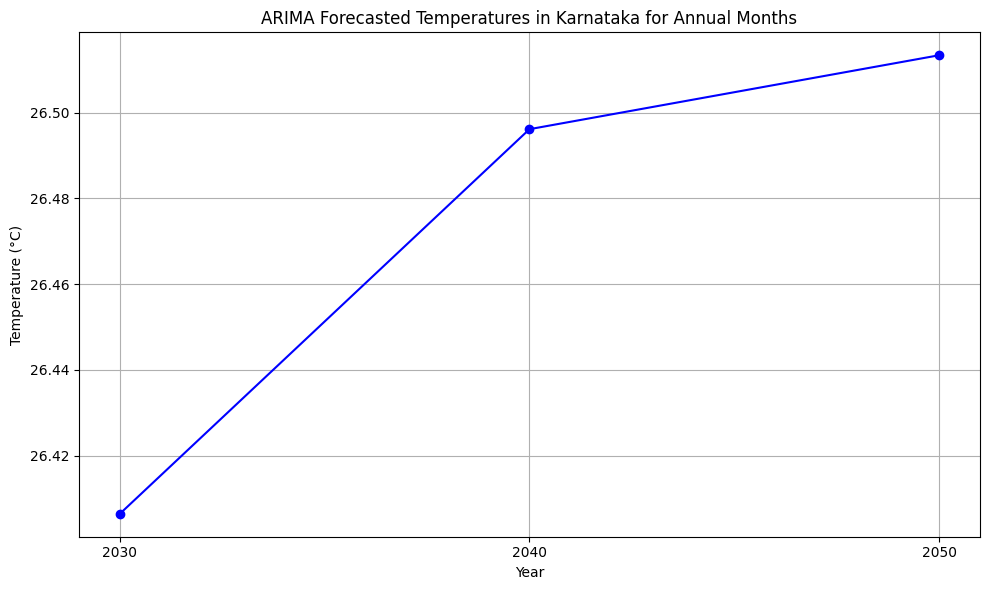

In [ ]:
import matplotlib.pyplot as plt

# Define the years for the forecast
years = [2030, 2040, 2050]

# Plot the ARIMA forecasted temperatures for the Annual months in a line graph
plt.figure(figsize=(10, 6))
plt.plot(years, forecast_df, marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('ARIMA Forecasted Temperatures in Karnataka for Annual Months')
plt.grid(True)
plt.xticks(years)
plt.tight_layout()
plt.show()